In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [11]:
# load dataframes
items = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/items_cleaned.csv',encoding = "ISO-8859-1")
evaluation = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/evaluation_cleaned.csv')
#transactions = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/transactions.csv', sep = '|')

#cos_sims = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/sims.csv', low_memory = False)
#cos_sims = cos_sims.iloc[: , 1:]

In [12]:
items.head()

,itemID,title.x,author,publisher,main.topic,subtopics,hug_article_id,title.y,authors,subtitle,...,shortDescription,book_type,price,availability,description,isbn,ean,pages,cover_image_url,oldID
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,5AH,13899697.0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Empfohlen von 7 bis 9 Jahren. \r\r\nSprache: E...,...,A brand-new story in the best-selling Princess...,eBook epub,6.49,Sofort lieferbar (Download),A brand-new story in the best-selling Princess...,NaN,9.781409e+12,128.0,https://media2.hugendubel.de/shop/coverscans/1...,21310
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"5AJ,AGZ,WFA,YBG,YBL,YNA,YPA",39730541.0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Über 100 Motive mit vielen Tipps und Techniken...,...,Schritt für Schritt über 100 Motive zeichnen ....,NaN,9.99,Sofort lieferbar,Schritt für Schritt über 100 Motive zeichnen ....,3.849928e+09,9.783850e+12,224.0,https://media2.hugendubel.de/shop/coverscans/3...,73018
2,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"5AC,5AD,YBG,YBL,YF",23962765.0,Meine Kindergarten-Freunde (Pirat),NaN,Empfohlen ab 3 Jahre. \r\r\n11. Auflage. \r\r\...,...,Erinnerungsalbum für kleine Piraten!Zur Erinne...,NaN,9.49,Sofort lieferbar,Zur Erinnerung an die KindergartenzeitDas idea...,4.014489e+12,4.014489e+12,64.0,https://media2.hugendubel.de/shop/coverscans/2...,40250
3,46107,Mein groÃes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"WD,WFTM,YBG,YBL,YBLD,YBLN1",35001654.0,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Mit über 30 tollen Schablonen malen lernen - P...,...,Die Welt der wilden TiereMalen lernen war noch...,NaN,9.99,Sofort lieferbar,Die Welt der wilden TiereMalen lernen war noch...,3.960932e+09,9.783961e+12,16.0,https://media2.hugendubel.de/shop/coverscans/3...,46107
4,34217,Ewig geliebt,J. R. Ward,Heyne Taschenbuch,FMR,"1KBB-US-NAK,FMX,FRX,3MRBF",26221111.0,Ewig geliebt,J. R. Ward,Black Dagger 28 - Roman. \r\r\nOriginaltitel: ...,...,Rhage und Mary sind Geliebte und Seelenverwand...,eBook epub,9.99,Sofort lieferbar (Download),Rhage und Mary sind Geliebte und Seelenverwand...,NaN,9.783641e+12,368.0,https://media2.hugendubel.de/shop/coverscans/2...,34217


In [32]:
evaluation.head()

,itemID
0,12
1,45274
2,10104
3,41371
4,14015


In [30]:
# create dataframe containing only evaluation items
eval_items = items[0:0]
count = 0
for i in range(0, len(evaluation)):
    x = items[items['itemID']==evaluation['itemID'][i]]
    eval_items = eval_items.append(x, ignore_index=True)

print("Books in the evaluations.csv file: ", len(evaluation))
print("Books matched in the items.csv file: ", len(eval_items))

Books in the evaluations.csv file:  1000
Books matched in the items.csv file:  1000


In [42]:
# find percentage of books with no subtopics
items_num = items['subtopics'].isna().sum()
eval_num = eval_items['subtopics'].isna().sum()
print("Percentage of books in the items_cleaned.csv file with no subtopics: ", 100*items_num/len(items))
print("Percentage of books in the evaluation_cleaned.csv file with no subtopics: ", 100*eval_num/len(eval_items) )

Percentage of books in the items_cleaned.csv file with no subtopics:  49.23216142843636
Percentage of books in the evaluation_cleaned.csv file with no subtopics:  47.8


In [51]:
# drop the rows which have no subtopics in them 
items = items.dropna(subset=['subtopics'])
print("The items dataframe now has ",len(items), " rows.")
eval_items = eval_items.dropna(subset=['subtopics'])
print("The eval_items dataframe now has ",len(eval_items), " rows.")

The items dataframe now has  37588  rows.
The eval_items dataframe now has  522  rows.


In [81]:
# reset index values for items and eval_items dataframes
eval_items = eval_items.reset_index()
items = items.reset_index()

ValueError: cannot insert level_0, already exists

In [54]:
# remove commas and square brackets from the subtopics
items['subtopics'] = items['subtopics'].str.replace('[','')
items['subtopics'] = items['subtopics'].str.replace(']','')
items['subtopics'] = items['subtopics'].str.replace(',',' ')
eval_items['subtopics'] = eval_items['subtopics'].str.replace('[','')
eval_items['subtopics'] = eval_items['subtopics'].str.replace(']','')
eval_items['subtopics'] = eval_items['subtopics'].str.replace(',',' ')

In [56]:
# define function to calculate cosine similarities
def getcossim(a,b):
    #swap if length of b is smaller than that of a, to avoid answers greater than 1
    if len(b)<len(a):
        (a,b) = (b,a)
    dot_product = []
    #iterate over all subtopics of a
    for i in range(0, len(a)):
        sim = []
        #iterate over all subtopics of b
        for j in range(0, len(b)):
            sim.append(0)
            #iterate over all letters of a particular subtopic of a, or b depending on the length
            for k in range(0, min(len(a[i]), len(b[j]))):
                if a[i][k]==b[j][k]:
                    sim[j] = sim[j] + 1
                else:
                    break
        dot_product.append(max(sim)/len(a[i]))
    cos_similarity = sum(dot_product)/math.sqrt(len(a)*len(b))
    return cos_similarity

In [89]:
#del items['index']
items

,itemID,title.x,author,publisher,main.topic,subtopics,hug_article_id,title.y,authors,subtitle,...,shortDescription,book_type,price,availability,description,isbn,ean,pages,cover_image_url,oldID
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,5AH,13899697.0,Princess Poppy: The Big Mix Up,Janey Louise Jones,Empfohlen von 7 bis 9 Jahren. \r\r\nSprache: E...,...,A brand-new story in the best-selling Princess...,eBook epub,6.49,Sofort lieferbar (Download),A brand-new story in the best-selling Princess...,NaN,9.781409e+12,128.0,https://media2.hugendubel.de/shop/coverscans/1...,21310
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,5AJ AGZ WFA YBG YBL YNA YPA,39730541.0,Einfach zeichnen! Step by Step,Wiebke Krabbe,Über 100 Motive mit vielen Tipps und Techniken...,...,Schritt für Schritt über 100 Motive zeichnen ....,NaN,9.99,Sofort lieferbar,Schritt für Schritt über 100 Motive zeichnen ....,3.849928e+09,9.783850e+12,224.0,https://media2.hugendubel.de/shop/coverscans/3...,73018
2,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,5AC 5AD YBG YBL YF,23962765.0,Meine Kindergarten-Freunde (Pirat),NaN,Empfohlen ab 3 Jahre. \r\r\n11. Auflage. \r\r\...,...,Erinnerungsalbum für kleine Piraten!Zur Erinne...,NaN,9.49,Sofort lieferbar,Zur Erinnerung an die KindergartenzeitDas idea...,4.014489e+12,4.014489e+12,64.0,https://media2.hugendubel.de/shop/coverscans/2...,40250
3,46107,Mein groÃes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,WD WFTM YBG YBL YBLD YBLN1,35001654.0,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Mit über 30 tollen Schablonen malen lernen - P...,...,Die Welt der wilden TiereMalen lernen war noch...,NaN,9.99,Sofort lieferbar,Die Welt der wilden TiereMalen lernen war noch...,3.960932e+09,9.783961e+12,16.0,https://media2.hugendubel.de/shop/coverscans/3...,46107
4,34217,Ewig geliebt,J. R. Ward,Heyne Taschenbuch,FMR,1KBB-US-NAK FMX FRX 3MRBF,26221111.0,Ewig geliebt,J. R. Ward,Black Dagger 28 - Roman. \r\r\nOriginaltitel: ...,...,Rhage und Mary sind Geliebte und Seelenverwand...,eBook epub,9.99,Sofort lieferbar (Download),Rhage und Mary sind Geliebte und Seelenverwand...,NaN,9.783641e+12,368.0,https://media2.hugendubel.de/shop/coverscans/2...,34217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37583,68349,"Bad Girls Don't Die (Bad Girls Don't Die, Book 1)",Katie Alender,HYPERION,YFCF,YFD,9808279.0,"Bad Girls Don't Die (Bad Girls Don't Die, Book 1)",Katie Alender,Empfohlen von 10 bis 14 Jahren. \r\r\nSprache:...,...,"In Alender's character-driven debut, outsider ...",Taschenbuch,10.49,vorbestellbar,"In Alender's character-driven debut, outsider ...",1.423109e+09,9.781423e+12,346.0,https://media2.hugendubel.de/shop/coverscans/9...,68349
37584,28307,Petey,Ben Mikaelsen,HYPERION,YXHB,YF,9808291.0,Petey,Ben Mikaelsen,Empfohlen von 12 bis 15 Jahren. \r\r\nSprache:...,...,"In 1922, at the age of two, Petey's distraught...",NaN,9.49,vorbestellbar,"In 1922, at the age of two, Petey's distraught...",1.423132e+09,9.781423e+12,280.0,https://media2.hugendubel.de/shop/coverscans/9...,28307
37585,37377,Resistance: Book 1,Carla Jablonski,FIRST SECOND,NHTZ1,1D YFT,9813100.0,Resistance: Book 1,Carla Jablonski,Empfohlen von 12 bis 18 Jahren. \r\r\nSprache:...,...,Fighting on a secret front of World War IIPaul...,Taschenbuch,18.49,vorbestellbar,Fighting on a secret front of World War IIPaul...,1.596433e+09,9.781596e+12,121.0,https://media2.hugendubel.de/shop/coverscans/9...,37377
37586,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,YFJ,9900634.0,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",Sprache: Englisch.,...,A selection of classic tales by Jacob and Wilh...,NaN,10.49,vorbestellbar,A selection of classic tales by Jacob and Wilh...,9.738883e+09,9.789739e+12,68.0,https://media2.hugendubel.de/sh

In [88]:
#del eval_items['index']
eval_items

,itemID,title.x,author,publisher,main.topic,subtopics,hug_article_id,title.y,authors,subtitle,...,shortDescription,book_type,price,availability,description,isbn,ean,pages,cover_image_url,oldID
0,10104,The Humble Seed,Linda Appleby,Linda Appleby,YFB,YX,38442720.0,The Humble Seed,Linda Appleby,HC gerader Rücken kaschiert. \r\r\nSprache: En...,...,"Timothy was the best reader in his class, and ...",NaN,21.49,Lieferbar innerhalb von drei Wochen,"Timothy was the best reader in his class, and ...",9.600254e+08,9.780960e+12,34.0,https://media2.hugendubel.de/shop/coverscans/3...,10104
1,41371,Dryadenhain & Dschinnenzauber (MÃ¤rchenantholo...,"Philipp Busch, Jonathan Driedger, Lena Kalupne...",Ulisses Spiel & Medien,FM,FMB WDHW,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41371
2,14015,The Man of Steel: Superman vs. the Moon Bandits,Scott Sonneborn,STONE ARCH BOOKS,YFCF,XQK,19877592.0,The Man of Steel: Superman vs. the Moon Bandits,Scott Sonneborn,Empfohlen von 8 bis 12 Jahren. \r\r\nSprache: ...,...,Intergalactic alien hijackers have stolen Eart...,Buch (gebunden),26.49,vorbestellbar,Intergalactic alien hijackers have stolen Eart...,1.434241e+09,9.781434e+12,81.0,https://media2.hugendubel.de/shop/coverscans/1...,14015
3,1822,School of Fear,Gitty Daneshvari,LITTLE BROWN BOOKS FOR YOUNG R,YFD,YFH,22966893.0,School of Fear,Gitty Daneshvari,Book 1. \r\r\nEmpfohlen von 9 bis 11 Jahren. \...,...,"Madeleine Masterson is deathly afraid of bugs,...",NaN,3.99,Sofort lieferbar (Download),"Madeleine Masterson is deathly afraid of bugs,...",NaN,9.781406e+12,368.0,https://media2.hugendubel.de/shop/coverscans/2...,1822
4,56794,Damaris (Band 2): Der Ring des FÃ¼rsten,C. M. Spoerri,Sternensand Verlag,FMB,FN,39545624.0,Damaris (Band 2): Der Ring des Fürsten,C. M. Spoerri,Empfohlen ab 14 Jahre.,...,"Wer im Taumel des Glücks tanzt, vergisst schne...",eBook epub,4.99,Sofort lieferbar (Download),"Wer im Taumel des Glücks tanzt, vergisst schne...",NaN,9.783752e+12,424.0,https://media2.hugendubel.de/shop/coverscans/3...,56794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2706,Jouniria,Alexander Eggerling,Books on Demand,FMB,5AQ,39264906.0,Jouniria,Alexander Eggerling,Die Legende der neun Leben. \r\r\nEmpfohlen ab...,...,"Jouniria ist eine magische Welt, in der Katzen...",NaN,7.99,Sofort lieferbar (Download),"Jouniria ist eine magische Welt, in der Katzen...",NaN,9.783752e+12,288.0,https://media2.hugendubel.de/shop/coverscans/3...,2706
518,58358,Mein Zauberwald,Johanna Basford,Knesebeck Von Dem GmbH,YBL,5AJ WFA WFX WZG YN,24986098.0,Mein Zauberwald,Johanna Basford,Postkartenbuch mit 20 herausnehmbaren Postkart...,...,Diese märchenhaften Motive aus Joanna Basfords...,NaN,9.95,Sofort lieferbar,Diese märchenhaften Motive aus Joanna Basfords...,3.868739e+09,9.783869e+12,40.0,https://media2.hugendubel.de/shop/coverscans/2...,58358
519,50163,Die Legenden von ShÃ¨ngdi,Steve Erun,Books on Demand,FM,1F,29884477.0,Die Legenden von Shèngdi,Steve Erun,Das Geheimnis.,...,"Eine junge Abenteurerin, im China des 16. Jahr...",NaN,6.99,Sofort lieferbar (Download),"Eine junge Abenteurerin, im China des 16. Jahr...",NaN,9.783745e+12,312.0,https://media2.hugendubel.de/shop/coverscans/2...,50163
520,5357,Run Wild,Gill Lewis,Barrington Stoke Ltd,YFM,5AJ 5AR YFP,39822094.0,Run Wild,Gill Lewis,Empfohlen von 8 bis 12 Jahren. \r\r\nSprache: ...,...,"Izzy and Asha need a space to call their own, ...",eBook epub,6.99,Sofort lieferbar (Download),"Izzy and Asha need a space to call their own, ...",NaN,9.781801e+12,NaN,https://media2.hugendubel.de/shop/coverscans/3...,5357


In [101]:
# example similarity calculation
a = eval_items['subtopics'][1]
b = items['subtopics'][3]
print("Book 1 subtopics: ", a)
print("Book 2 subtopics: ", b)
a = a.split()
b = b.split()
print("Similarity: ",getcossim(a,b))

Book 1 subtopics:  FMB WDHW
Book 2 subtopics:  WD WFTM YBG YBL YBLD YBLN1
Similarity:  0.14433756729740646


In [127]:
# create empty dataframe for filling in cosine similarity values
cos_sims = pd.DataFrame(columns=['from', 'to', 'score'], index=range(len(items)*len(eval_items)))
cos_sims.head()

,from,to,score
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [125]:
items

37588

In [126]:
len(eval_items)

522

In [116]:
# print all book titles for the books that are to be evaluated
for i in range(0, len(eval_items)):
    print(i, "\t", eval_items['title.x'][i])

0 	 The Humble Seed
1 	 Dryadenhain & Dschinnenzauber (MÃ¤rchenanthologie)
2 	 The Man of Steel: Superman vs. the Moon Bandits
3 	 School of Fear
4 	 Damaris (Band 2): Der Ring des FÃ¼rsten
5 	 Evil Emperor Penguin: Winging It
6 	 Warhammer 40.000 - Belisarius Cawl
7 	 Charlie Bone and the Blue Boa
8 	 Secret Kingdom: Mermaid Magic
9 	 Gandorr Ã la Poursuite de l'Invisible Noak
10 	 Sold on Subtraction
11 	 The Magic Mirror: Branches Book (Once Upon a Fairy Tale #1), Volume 1
12 	 Otherland 3
13 	 Roxie and the Hooligans
14 	 Blueberry Summer
15 	 Mein KÃ¼nstler-Kreativbuch
16 	 Beyond
17 	 Die Stadt der singenden Flamme
18 	 Elfenseele 02. Zwischen den Nebeln
19 	 The Jasmine Throne (Hardcover Library Edition)
20 	 DORK Diaries 5: Nikkis (nicht ganz so) guter Rat in allen Lebenslagen
21 	 Kreativ-Set Kinderleichte Papiersterne
22 	 Hochgradig unlogisches Verhalten
23 	 My Loch Ness Journey
24 	 Es zerstÃ¶rt dich
25 	 Die ALB-Detektive
26 	 Alien in My Pocket #8: Space Invaders
27 	 Le

In [128]:
# Calculate cosine similarities for all books and store as a .csv file to desktop
for i in range(len(eval_items)):
    a = eval_items['subtopics'][i]
    a = a.split()
    print(i)
    
    for j in range(len(items)):
        b = items['subtopics'][j]
        b = b.split()
        
        cos_similarity = getcossim(a,b)
        cos_sims.iloc[i*len(items) + j][0] = eval_items['itemID'][i]
        cos_sims.iloc[i*len(items) + j][1] = items['itemID'][j]
        cos_sims.iloc[i*len(items) + j][2] = cos_similarity

cos_sims.to_csv(r'C:\Users\Hassan Ali\Desktop\sims.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27



Book Title:  Angel Whitewolf
Subtopics:   

Similar Books:
 Series([], Name: title, dtype: object) 

Subtopics:
 Series([], Name: subtopics, dtype: object)


Similarities:
 78029    0
26012    0
26005    0
26006    0
26007    0
26008    0
26009    0
26010    0
26011    0
Name: 259, dtype: int64


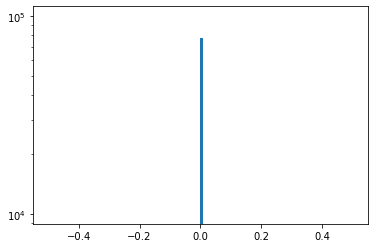

In [24]:
# Check recommendations for books in the eval_items dataframe
 
# index number for the book in the eval_items dataframe; valid values from 0 to 521
i = 0
# selection threshold for similarities
threshold = 0.70
# Display these many recommendations
no_of_books = 10

x = []
col = cos_sims.iloc[:,i]
col = col.sort_values(ascending = False)
x = col.index[col>threshold]
x = x.tolist()
del x[no_of_books:]
print("\n\nBook Title: ", eval_items['title.x'][i])
print("Subtopics: ", eval_items['subtopics'][i],"\n")
print("Similar Books:\n",  items['title.x'][x], "\n\nSubtopics:\n", items['subtopics'][x])

# distribution showing the number of books for the similarity values
plt.hist(col, bins = 100, log = True)

print("\n\nSimilarities:\n", col.iloc[0:no_of_books-1])

In [69]:
# OLD CODE

# Calculate Similarities for all books 
for i in range(0, len(eval_items)):
#for i in range(0, 4):
    a = eval_items['subtopics'][i]
    a = a.split()
    print(i)
    if len(a)==0:
        for j in range(len(items)):
            cos_sims.iloc[i*78030 + j][0] = eval_items['itemID'][i]
            cos_sims.iloc[i*78030 + j][1] = items['itemID'][j]
            cos_sims.iloc[i*78030 + j][2] = 0
        continue

    for j in range(0, len(items)):
        b = items['subtopics'][j]
        if pd.isna(b):
            b = "" # missing values are considered as empty strings
        b = b.split()
        if len(a)==0 or len(b)==0:
            cos_similarity = 0
        else:
            #cos_similarity = len(set(a) & set(b))/math.sqrt(len(a)*len(b))
            cos_similarity = getcossim(a,b)
        #cos_sims.iloc[j,i] = cos_similarity
        cos_sims.iloc[i*78030 + j][0] = eval_items['itemID'][i]
        cos_sims.iloc[i*78030 + j][1] = items['itemID'][j]
        cos_sims.iloc[i*78030 + j][2] = cos_similarity

cos_sims.head()

# store as a .csv file to desktop
cos_sims.to_csv(r'C:\Users\Hassan Ali\Desktop\sims.csv')

0
1
2
3
4
5
6
7
8
9
10


KeyboardInterrupt: 

In [81]:
cos_sims = pd.read_csv('C:/Users/Hassan Ali/Desktop/sims.csv',low_memory = False)
cos_sims = cos_sims.drop('Unnamed: 0',axis=1)

In [82]:
cos_sims

,from,to,score
0,10104,21310,0.000000
1,10104,73018,0.188982
2,10104,40250,0.223607
3,10104,46107,0.204124
4,10104,34217,0.000000
...,...,...,...
19620931,12971,68349,0.333333
19620932,12971,28307,0.333333
19620933,12971,37377,0.235702
19620934,12971,37678,0.333333


In [86]:
cos_sims = cos_sims.drop(indices, axis=0)

In [87]:
cos_sims

,from,to,score
0,10104,21310,0.000000
1,10104,73018,0.188982
2,10104,40250,0.223607
3,10104,46107,0.204124
4,10104,34217,0.000000
...,...,...,...
19620931,12971,68349,0.333333
19620932,12971,28307,0.333333
19620933,12971,37377,0.235702
19620934,12971,37678,0.333333


In [71]:
cos_sims['from'][156685] == cos_sims['to'][156685]

False

In [84]:
indices = [] 
for i in range(0,len(cos_sims)):
    if cos_sims['from'][i] == cos_sims['to'][i]:
        indices.append(i)


In [85]:
len(indices)

522

In [90]:
cos_sims = pd.read_csv('C:/Users/Hassan Ali/Desktop/sims.csv',low_memory = False)
cos_sims = cos_sims.drop('Unnamed: 0',axis=1)
cos_sims

,from,to,score
0,10104,21310,0.000000
1,10104,73018,0.188982
2,10104,40250,0.223607
3,10104,46107,0.204124
4,10104,34217,0.000000
...,...,...,...
19620931,12971,68349,0.333333
19620932,12971,28307,0.333333
19620933,12971,37377,0.235702
19620934,12971,37678,0.333333


In [91]:
indices = [] 
for i in range(0,len(cos_sims)):
    if cos_sims['score'][i] == 0:
        indices.append(i)

In [93]:
len(indices)

8543283

In [92]:
cos_sims = cos_sims.drop(indices, axis=0)

In [96]:
cos_sims = cos_sims.reset_index(drop=True)
cos_sims

,from,to,score
0,10104,73018,0.188982
1,10104,40250,0.223607
2,10104,46107,0.204124
3,10104,31436,0.288675
4,10104,14576,0.250000
...,...,...,...
11077648,12971,68349,0.333333
11077649,12971,28307,0.333333
11077650,12971,37377,0.235702
11077651,12971,37678,0.333333


In [97]:
cos_sims.to_csv(r'C:\Users\Hassan Ali\Desktop\cos_sims.csv')

In [98]:
item_id = 10104
df = cos_sims[cos_sims['from']==item_id]
df = df.sort_values(by='score', ascending=False)
print(df.iloc[0:50])

        from     to  score
18016  10104  78584    1.0
19377  10104  44229    1.0
23429  10104  54583    1.0
23430  10104  34043    1.0
23431  10104   6185    1.0
23432  10104  69130    1.0
23433  10104  15268    1.0
23434  10104    846    1.0
23435  10104  65160    1.0
23436  10104   2064    1.0
10177  10104  33532    1.0
23437  10104  15647    1.0
23438  10104  42915    1.0
23439  10104  52102    1.0
23440  10104  53579    1.0
23441  10104   2590    1.0
23442  10104    742    1.0
23443  10104  16901    1.0
23444  10104  41130    1.0
19389  10104  57315    1.0
23446  10104  29797    1.0
10182  10104  60862    1.0
23448  10104  68672    1.0
23428  10104  17941    1.0
23426  10104  45475    1.0
10137  10104  60667    1.0
23425  10104  70490    1.0
10138  10104  78791    1.0
23407  10104   9178    1.0
23408  10104  27922    1.0
10140  10104  22434    1.0
10144  10104  35311    1.0
23409  10104  28372    1.0
23410  10104  58190    1.0
23411  10104  26949    1.0
19373  10104  24707    1.0
2